In [1]:
import tensorflow as tf
import zipfile,os
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karlinasuryaw","key":"2ca4d1c4b5375b5a7fe4746f5cee7cbe"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download karlinasuryaw/chestxray-dataset

 99% 157M/158M [00:01<00:00, 131MB/s]
100% 158M/158M [00:01<00:00, 129MB/s]


In [8]:
! unzip chestxray-dataset.zip

Archive:  chestxray-dataset.zip
  inflating: dataset/covid/COVID-1.png  
  inflating: dataset/covid/COVID-10.png  
  inflating: dataset/covid/COVID-100.png  
  inflating: dataset/covid/COVID-1000.png  
  inflating: dataset/covid/COVID-1001.png  
  inflating: dataset/covid/COVID-1002.png  
  inflating: dataset/covid/COVID-1003.png  
  inflating: dataset/covid/COVID-1004.png  
  inflating: dataset/covid/COVID-1005.png  
  inflating: dataset/covid/COVID-1006.png  
  inflating: dataset/covid/COVID-1007.png  
  inflating: dataset/covid/COVID-1008.png  
  inflating: dataset/covid/COVID-1009.png  
  inflating: dataset/covid/COVID-101.png  
  inflating: dataset/covid/COVID-1010.png  
  inflating: dataset/covid/COVID-1011.png  
  inflating: dataset/covid/COVID-1012.png  
  inflating: dataset/covid/COVID-1013.png  
  inflating: dataset/covid/COVID-1014.png  
  inflating: dataset/covid/COVID-1015.png  
  inflating: dataset/covid/COVID-1016.png  
  inflating: dataset/covid/COVID-1017.png  
  infla

In [9]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
!pip install split_folders
import splitfolders

In [11]:
splitfolders.ratio('/content/dataset', '/content/process/data', seed=1, ratio=(.6, .4))

Copying files: 4400 files [00:01, 4333.88 files/s]


In [12]:
base_dir = '/content/process/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/content/process/data/train')
os.listdir('/content/process/data/val')

['normal', 'covid']

In [13]:
#Train Set
train_normal_dir = os.path.join(train_dir, 'normal')
train_covid_dir = os.path.join(train_dir, 'covid')

In [14]:
#Validation Set
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_covid_dir = os.path.join(validation_dir, 'covid')

In [15]:
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  zoom_range=0.2, 
  horizontal_flip=True) 

In [16]:
test_datagen = ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2, 
  zoom_range=0.2,
  horizontal_flip=True)

In [17]:
train_generator = train_datagen.flow_from_directory(
  train_dir, #direktori data latihnya
  target_size=(150, 150), #Mengubah Resolusi 
  batch_size=32, 
  color_mode='rgb', #Menggunakan Rgb
  class_mode='binary', 
  shuffle = True, 
  seed=42)

validation_generator = test_datagen.flow_from_directory(
  validation_dir, #direktori data validasii
  target_size=(150, 150),
  batch_size=32,
  color_mode='rgb',
  class_mode='binary',
  shuffle = True,
  seed=42)

Found 2640 images belonging to 2 classes.
Found 1760 images belonging to 2 classes.


In [18]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

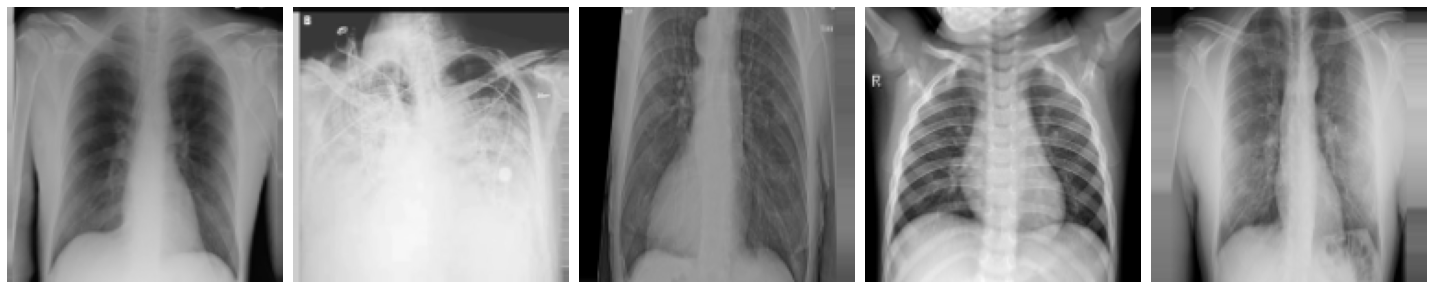

In [20]:
plotImages(sample_train_images[:6])

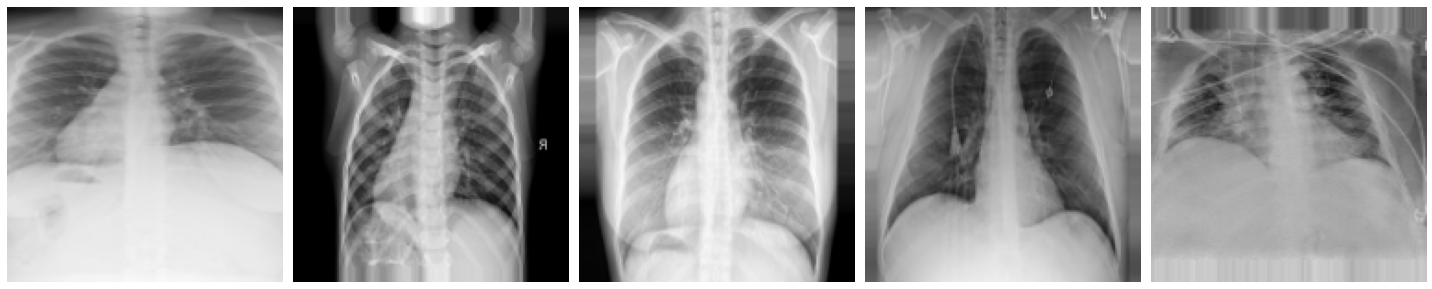

In [21]:
plotImages(sample_val_images[:6])

In [22]:
  model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [24]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
#train = model.fit(train_generator, 
#          steps_per_epoch=20, 
#          epochs=20, 
#          validation_data=validation_generator,
#          validation_steps=5,
#          verbose=1)

import math

batch_size=32
train_size=2640
validation_size=1760

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#menghitung nilai step per epoch dan val step
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(train_size)
val_steps = compute_steps_per_epoch(validation_size)

base_model = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/30
83/83 [==============================] - 139s 2s/step - loss: 0.5129 - accuracy: 0.7379 - val_loss: 0.3946 - val_accuracy: 0.8273
Epoch 2/30
83/83 [==============================] - 129s 2s/step - loss: 0.3596 - accuracy: 0.8542 - val_loss: 0.3428 - val_accuracy: 0.8597
Epoch 3/30
83/83 [==============================] - 129s 2s/step - loss: 0.3504 - accuracy: 0.8458 - val_loss: 0.2918 - val_accuracy: 0.8750
Epoch 4/30
83/83 [==============================] - 129s 2s/step - loss: 0.3271 - accuracy: 0.8598 - val_loss: 0.3201 - val_accuracy: 0.8591
Epoch 5/30
83/83 [==============================] - 129s 2s/step - loss: 0.3260 - accuracy: 0.8636 - val_loss: 0.3090 - val_accuracy: 0.8756
Epoch 6/30
83/83 [==============================] - 129s 2s/step - loss: 0.2913 - accuracy: 0.8803 - val_loss: 0.2936 - val_accuracy: 0.8710
Epoch 7/30
83/83 [==============================] - 128s 2s/step - loss: 0.2902 - accuracy: 0.8818 - val_loss: 0.3163 - val_accuracy: 0.8557
Epoch 8/30
83

In [26]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

83/83 [==============================] - 39s 464ms/step - loss: 0.1232 - accuracy: 0.9527
Loss: 0.1232
Accuracy: 0.9527


In [27]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

55/55 [==============================] - 26s 470ms/step - loss: 0.1988 - accuracy: 0.9267
Loss: 0.1988
Accuracy: 0.9267


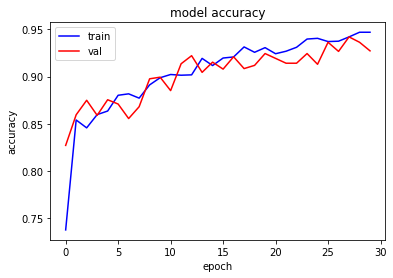

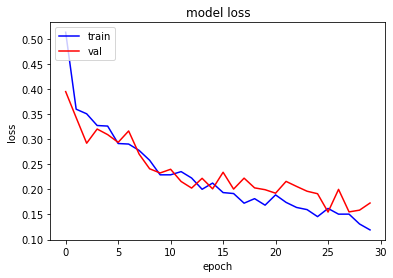

In [28]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

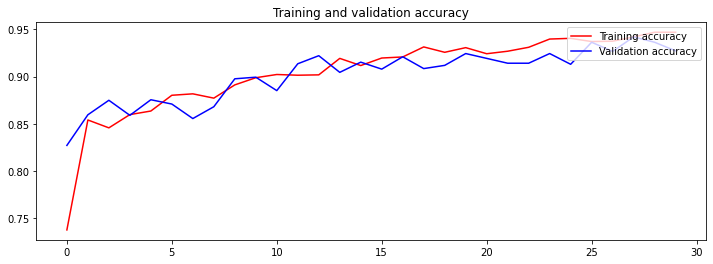

<Figure size 432x288 with 0 Axes>

In [29]:
acc2 = base_model.history['accuracy']
val_acc2 = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']

epochs = range(len(acc2))

plt.figure(figsize=(12, 4))
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='upper right')
plt.figure()


plt.show()

In [30]:
print(train_generator.class_indices)

{'covid': 0, 'normal': 1}


Saving COVID-119.png to COVID-119.png
covid


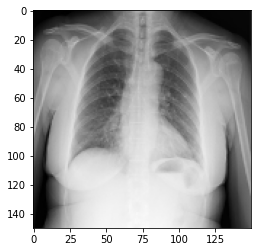

In [34]:
%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)


  if classes <= 0.5:
    print('covid')
  else:
    print('normal')

In [35]:
model.save("model.h5")